IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READING THE FILE

In [2]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [3]:
match.shape

(756, 18)

In [4]:
delivery.shape

(179078, 21)

In [5]:
 match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### 1) CREATING A DATAFRAME WHICH WILL GIVE THE TOTAL SCORE OG BOTH THE INNINGS FOR  EVERY MATCH

In [7]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [8]:
total_score_df.shape

(1528, 3)

#### 2) CREATING A DATAFRAME WHICH GIVES THE TOTAL SCORE IN 1ST INNING IN EACH MATCH

In [9]:
total_score_df_1=total_score_df[total_score_df['inning']==1]
total_score_df_1.shape

(756, 3)

CREATING A DATAFRAME WHICH WILL GIVE INFO ABOUT EACH AND EVERY MATCH

In [10]:
total_match=match.merge(total_score_df_1[['match_id','total_runs']],left_on='id',right_on='match_id')
total_match.shape

(756, 20)

In [11]:
total_match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

####  3) THERE ARE MANY TEAMS WHICH ARE OUT OF THE  TOURNAMENT AND SOME TEAMS WHICH ARE RENAMED TO NEW NAME-
* SO WE HAVE TO RENAME NAMES AND RULED OUT THOSE TEAMS WHICH ARE NOT PART OF IPL ANYMORE...

In [12]:
teams=['Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore',
       'Kolkata Knight Riders','Chennai Super Kings', 'Rajasthan Royals','Delhi Capitals','Punjab Kings']

In [13]:
total_match['team1']=total_match['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
total_match['team2']=total_match['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

total_match['team1']=total_match['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
total_match['team2']=total_match['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

total_match['team1']=total_match['team1'].str.replace('Kings XI Punjab','Punjab Kings')
total_match['team2']=total_match['team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [14]:
match_df=total_match[total_match['team1'].isin(teams)]
match_df=total_match[total_match['team2'].isin(teams)]

In [15]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Punjab Kings,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,6,135


In [16]:
match_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Punjab Kings', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Rajasthan Royals', 'Chennai Super Kings'],
      dtype=object)

SO THERE ARE 8 TEAMS NOW (WHICH IS CORRECT)--

#### 5) WE SHOULD REMOVE 'RAIN AFFECTED MATCHES' AS WELL
* FOR THAT THERE IS A COLUMN-----> dl_applied which is 1 means there was rain during the match and it is 0 wwhen there was no rain..

In [17]:
match_df=match_df[match_df['dl_applied']==0]
match_df['dl_applied'].value_counts()

0    676
Name: dl_applied, dtype: int64

In [18]:
match_df.shape

(676, 20)

In [19]:
match_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183


##### 6) TAKING SOME COLUMNS AND MAKING THE DATFRAME OFR SECOND INNINGS ONLY

In [20]:
match_df=match_df[['match_id','city','winner','total_runs']]
match_df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
2,3,Rajkot,Kolkata Knight Riders,183
3,4,Indore,Kings XI Punjab,163
4,5,Bangalore,Royal Challengers Bangalore,157
5,6,Hyderabad,Sunrisers Hyderabad,135


In [21]:
delivery_df=match_df.merge(delivery,on='match_id')
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN


WE WANT ONLY SECOND INNINGS

In [22]:
delivery_df=delivery_df[delivery_df['inning']==2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [23]:
delivery_df.shape

(78145, 24)

#### 7)  CREATING COLUMNS TO FIND - 'RUNS_LEFT' AND 'BALLS_LEFT'

In [24]:
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']

CREATING 'runs_left' COLUMN

In [25]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161490,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
161491,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
161492,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
161493,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


CREATING 'balls_left' column---

In [26]:
delivery_df['balls_left']=126 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161490,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
161491,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
161492,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
161493,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


CREATING 'wickets_left' COLUMN

In [27]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna('0')
## filling nan values with str(0)
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x== '0' else '1')
## filling str(1) at any player name which comes in player dismissed column otherwise str(0)..
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
### converting the str dtype to int
wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
## calulating wickets at each ball
delivery_df['wickets']=10-wickets
## creating column for 'wickets_left'
delivery_df.head(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10


#### 8) CREATING 'CURRENT_RUN_RATE' COLUMN AND 'REQUIRED RUN RATE'

In [28]:
## CUR_RR= (RUNS SCORED)/(OVERS)
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,118,10,3.0


In [29]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/(delivery_df['balls_left'])
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.0,10.474576


#### 9) CREATING 'RESULT' COLUMN
* IF BATTING TEAM == WINNER TEAM THEN RESULT IS 1, ELSE 0---

In [30]:
# creating a function for result
def result(row):
    if row['batting_team']==row['winner']:
        return 1
    else:
        return 0

In [31]:
delivery_df['result']=delivery_df.apply(result,axis=1)
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.0,10.474576,0


#### EXTRACTING REQUIRED COLUMNS FROM OUR DATAFRAME 

In [32]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [33]:
final_df.shape

(78145, 10)

In [34]:
final_df=final_df.sample(final_df.shape[0])
# we are shuffling otherwise it will create bias in modelling building since all the balls of the same match are consecutive to one another.

In [35]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
49486,Kolkata Knight Riders,Rajasthan Royals,Kolkata,70,67,8,132,7.018868,6.268657,1


#### 10) MODEL BUILDING

CHECKING FOR NULL VALUES

In [36]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               8
result            0
dtype: int64

REMOVING NULL VALUES SO THAT IT WILL CREATE NAY PROBLEM IN OUR MODELLING

In [37]:
final_df.dropna(inplace=True)
final_df.head(2)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
54239,Delhi Daredevils,Pune Warriors,Mumbai,120,82,10,187,10.578947,8.780488,1
64744,Mumbai Indians,Chennai Super Kings,Chennai,95,104,10,112,6.375000,5.480769,1


In [38]:
final_df.shape
#checking the shape

(77305, 10)

REMOVING THOSE ROWS IN WHICH 'BALLS_LEFT' == 0 , COZ THIS WILL CREATE 'REQUIRED RR' = 'INFINITY'.....

In [39]:
final_df=final_df[final_df['balls_left']!= 0]
final_df.shape

(77057, 10)

In [40]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
#splitting our df in x and y

In [41]:
from sklearn.model_selection import train_test_split
#importing TRAIN_TEST_SPLIT

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1)

SINCE OUR THREE COLUMNS ARE CATEGORICAL FEATURES, WE HAVE TO ENCODE THEM..

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
trf=ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

CREATING A PIPELINE OF LOGISTIC REGRESSION

In [44]:
from sklearn.pipeline import Pipeline
pipe= Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [45]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [46]:
y_pred=pipe.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.807336274764253

CREATING A PIPELINE FOR RANDOM FOREST 

In [48]:
pipe2= Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [49]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [50]:
accuracy_score(y_test,pipe2.predict(x_test))

0.9988753352366122

* HERE WE CAN SEE THE HUGE DIFFERENCE IN THE ACCURACIES OF BOTH THE MODELS---
* LOGISTIC REGRESSION HAS ACCURACY SCORE OF 0.8101911930097759 AND RANDOM FOREST HAS 0.9987888225625055.
* SO RF IS PREDICTING THE EXCAT RESULT BUT DURING THE MATCH WE CANNOT BE TOO BAISED TOWARDS ONE TEAM.
* LIKE BELOW----

In [48]:
pipe.predict_proba(x_test)[7]
## FOR LOGISTIC REGRESSION

array([0.63888633, 0.36111367])

In [52]:
pipe2.predict_proba(x_test)[7]
# FOR RANDOM FOREST

array([1., 0.])

HERE RANDOM FOREST IS GIVING TOO EXACT RESULT BUT WE WANT PROBABILITY FOR BOTH TEAMS
* SO HERE WE WILL USE LOGISTIC REGRESSION

#### 11) CREATING A FUNCTION WHICH WILL GIVE THE DETAILS ABOUT THE MATCH AT EACH OVER PROGRESSIVELY.

In [53]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [54]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
13836,1,4,0,50.1,49.9
13844,2,8,0,44.6,55.4
13850,3,1,0,51.8,48.2
13856,4,7,1,64.1,35.9
13862,5,12,0,53.1,46.9
13868,6,13,0,40.5,59.5
13874,7,9,0,34.8,65.2
13882,8,15,0,22.0,78.0
13888,9,7,0,20.2,79.8
13895,10,17,0,10.5,89.5


###### SO HERE WE CAN SEE OUR PREDICTING GOOD RESULTS OVER BY OVER

##### 12) CREATING A FUNCTION WHICH WILL GIVE THE SPIDER WORM GRAPH--
* THIS WILL WINING,LOSING PROBABILITIES AND RUNS SCORED AT DURING EACH OVER

Text(0.5, 1.0, 'Target-178')

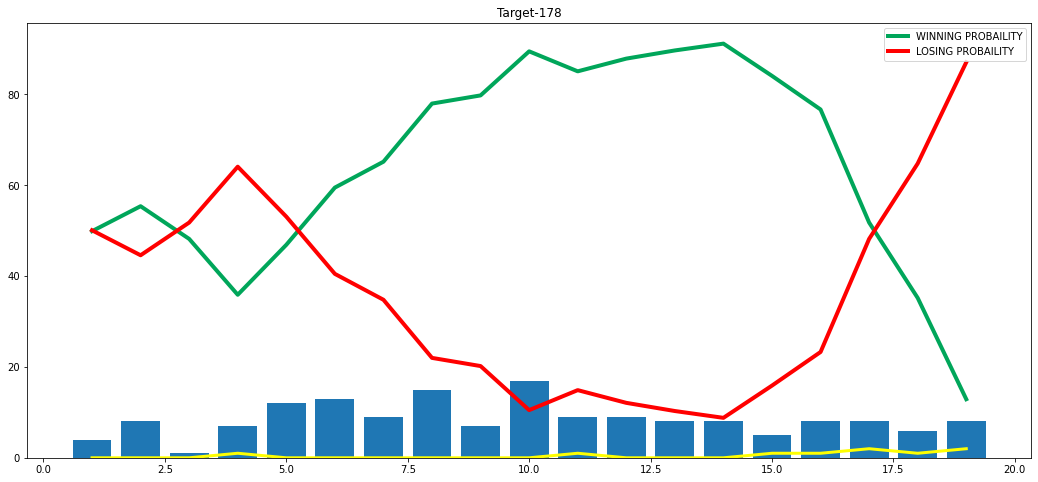

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4,label='WINNING PROBAILITY')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4,label='LOSING PROBAILITY')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.legend()
plt.title('Target-' + str(target))

In [49]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Punjab Kings']

In [50]:
delivery_df['city'].unique()

array(['Hyderabad', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai', 'Kolkata',
       'Delhi', 'Pune', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [53]:
import joblib

In [54]:
joblib.dump(pipe,'model2.pkl')

['model2.pkl']

In [55]:
model1=joblib.load('model2.pkl')

In [56]:
print(accuracy_score(y_train,model1.predict(x_train)))

0.8083605606278055
